# Analisis del set de datos del proyecto 4Puntocero


### En este documento realizaré una exploración inicial de los datos, empezaré describiendo el set de datos y luego mostraré algunos datos descriptivos y examinaré un caso especifico de uso. Terminaré con una evalución de los posibles usos 


## 1. Descripcion de los datos

### Librerias Usadas

In [114]:
from google.cloud import bigquery
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [115]:
client = bigquery.Client(location="US")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: pe-4puntocero-xml-gcp


### La base de datos existe en bigquery, fue creada a partir de un set pequeño de XMLs. Cada fila en el set de datos contiene:

#### - Id_sup_type: Tipo de identificacion de la persona que emitió la factura
#### - Id_sup: identificacion de la persona que emitió la factura
#### - Id_name_sup: nombre de la persona que emitió la factura
#### - net amount currency: typo de moneda usada en la  factura
#### - net_total_amount: precio neto total de la factura
#### - date: fecha
#### - items es un campo que contiene todos los productos, su precio y su cantidad vendida
#### Miremos detenidamente los productos que contiene la base de datos:


In [118]:
query = """
SELECT
 Id_sup,
 itemss.Item_des
FROM
  `pe-4puntocero-xml-gcp.tries.newes_of_new`,
  UNNEST(items) AS itemss
  """


query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df_prod = query_job.to_dataframe()

#df_prod

#print("Hay {} registros  En este dataset. \n".format(df_prod.shape[0]))

#print("Hay {} Productos en este dataset, entre ellos estan: {}... \n".format(len(df_prod.Item_des.unique()),
                                                                #A           ", ".join(df_prod.Item_des.unique()[0:5])))

      
      

#### Hay 3886 registros  En este dataset. 
#### Hay 225 Productos en este dataset, entre ellos estan: Jugada VR, PISCO SOUR CLASICO, GASEOSA 450 ML, PALTA REINA, CEVICHE APALTADO...
#### A continuación hice una tabla de estadísticas descriptivas de los productos más frecuentes y un gráfico.

In [61]:
dsc_prod = df_prod.groupby("Item_des").describe()
top_prod = dsc_prod.sort_values([('Id_sup','count')], ascending = False)
top_prod.head(n=10)

Id_sup                                                 \
                    count          mean  std           min           25%   
Item_des                                                                   
Jugada VR           900.0  2.049309e+10  0.0  2.049309e+10  2.049309e+10   
GASEOSA 450 ML      222.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
JARRA DE LIMONADA   161.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
TE                   93.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
LOMO SALTADO         86.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
PISCO SOUR CLASICO   85.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
MENU MOCHICA         71.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
CEVICHE MIXTO        56.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
JUGO PI�A            56.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   
CAZUELA DE VACUNO    53.0  1.040194e+10  0.0  1.040194e+10  1.040194e+10   

                                                              
                             50%           75%           max  
Item_des                                                      
Jugada VR           2.049309e+10  2.049309e+10  2.049309e+10  
GASEOSA 450 ML      1.040194e+10  1.040194e+10  1.040194e+10  
JARRA DE LIMONADA   1.040194e+10  1.040194e+10  1.040194e+10  
TE                  1.040194e+10  1.040194e+10  1.040194e+10  
LOMO SALTADO        1.040194e+10  1.040194e+10  1.040194e+10  
PISCO SOUR CLASICO  1.040194e+10  1.040194e+10  1.040194e+10  
MENU MOCHICA        1.040194e+10  1.040194e+10  1.040194e+10  
CEVICHE MIXTO       1.040194e+10  1.040194e+10  1.040194e+10  
JUGO PI�A           1.040194e+10  1.040194e+10  1.040194e+10  
CAZUELA DE VACUNO   1.040194e+10  1.040194e+10  1.040194e+10

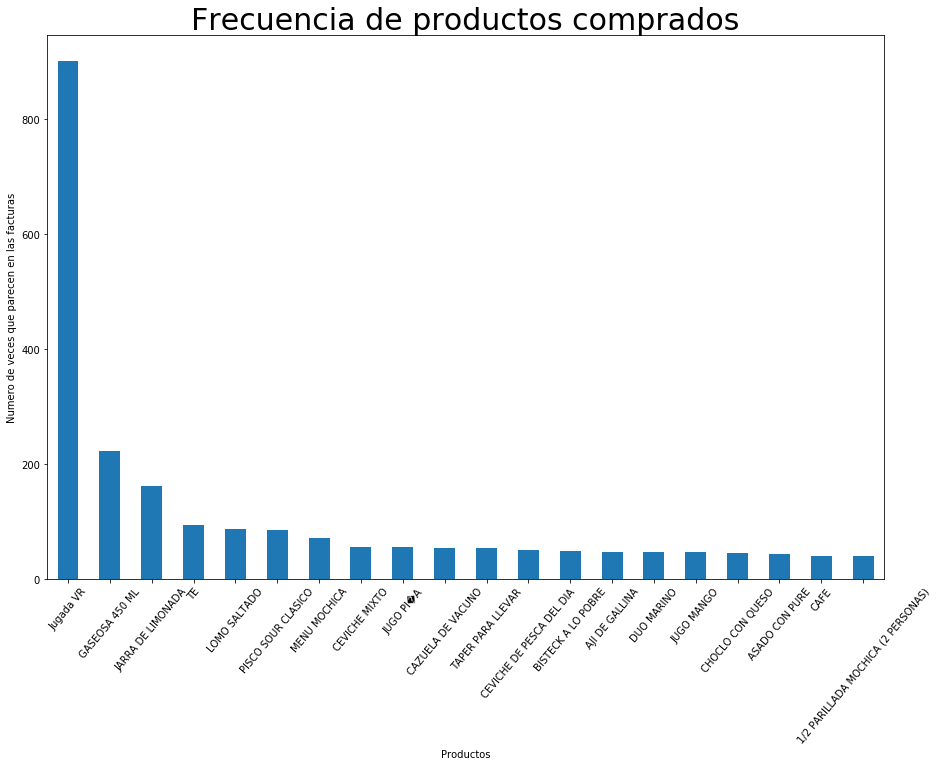

In [54]:
plt.figure(figsize=(15,10))
dsc_prod = df_prod.groupby("Item_des").describe()
top_prod['Id_sup']['count'].head(n=20).plot.bar()
plt.title('Frecuencia de productos comprados',{'fontsize':30})
plt.xticks(rotation=50)plt.figure(figsize=(15,10))
dsc_prod = df_prod.groupby("Item_des").describe()
top_prod['Id_sup']['count'].head(n=20).plot.bar()
plt.title('Frecuencia de productos comprados',{'fontsize':30})
plt.xticks(rotation=50)
plt.xlabel("Productos")
plt.ylabel("Numero de veces que parecen en las facturas")
plt.show()
plt.xlabel("Productos")
plt.ylabel("Numero de veces que parecen en las facturas")
plt.show()

In [43]:
a = ''
df_prods = df_prod[df_prod["Item_des"] != "Jugada VR"]
for n,row in df_prods .iterrows():
    a += row.Item_des + ' '

### Esta descripcion tambien se puede ver en la forma de un Word Cloud

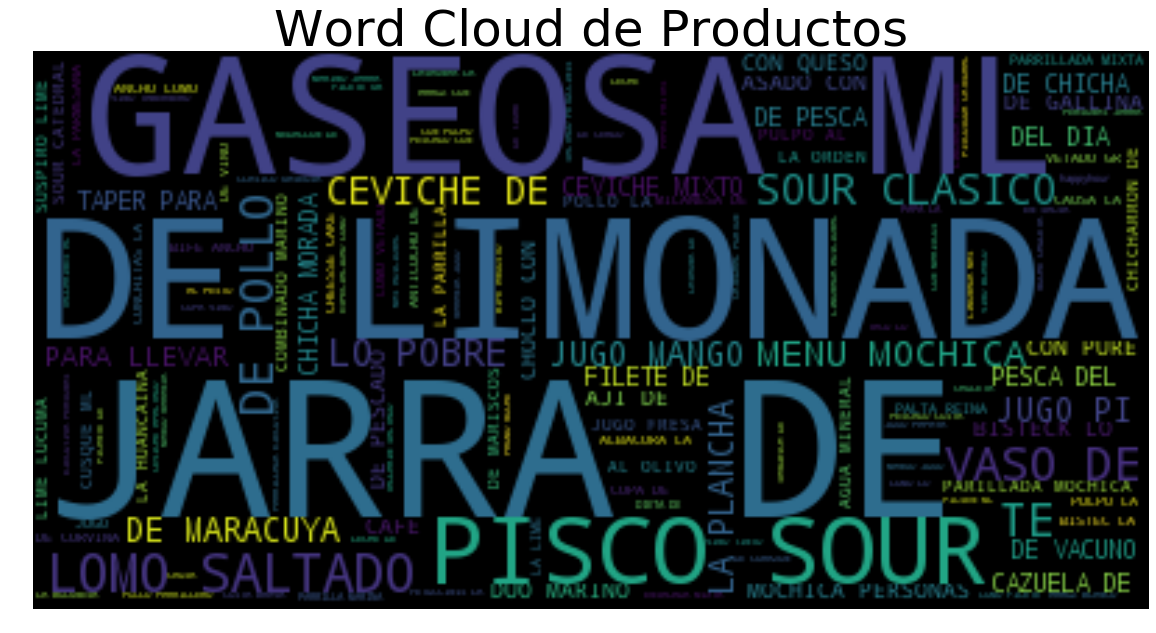

In [52]:
wordcloud = WordCloud().generate(a)
plt.figure(figsize=(20,15))
plt.title('Word Cloud de Productos',{'fontsize':50})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2. Un caso: Las Gaseosas y dos preguntas concretas: 
#### - ¿Cuál es el market share de las gaseosas? 
#### - ¿ Cuál es porcentaje que representan en el recibo?

In [90]:
query = """
SELECT
  Id_sup,
  date,
  Id_name_sup,
  net_total_amount_currency,
  net_total_amount,
  Quantity,
  price,
  Item_des
FROM
  `pe-4puntocero-xml-gcp.tries.newes_of_new`,
  UNNEST(items) AS itemss
WHERE
  REGEXP_CONTAINS(LOWER(itemss.Item_des), r'(gaseosa).+')
"""

query_job = client.query(
    query,
    # Location must match that of the dataset(s) referenced in the query.
    location="US",
)  # API request - starts the query

df = query_job.to_dataframe()
df['date_time'] = pd.to_datetime(df['date'])
df['weekday'] =  df['date_time'].dt.weekday

### Todos los productos en este data set tienen la misma moneda: Sol Peruano

In [93]:
df["net_total_amount_currency"].unique()

array(['PEN'], dtype=object)

### Todos los productos fueron comprados el mismo dia: 2019-08-02


In [81]:
df['date_time'].unique()


array(['2019-08-02T00:00:00.000000000'], dtype='datetime64[ns]')

### Para estos recibos el mercado de gaseosas es representado como 1390 soles por día

In [119]:
np.sum(df['Quantity']*df['price'])

1390.7200000000003

### El peso agregado de las gaseosas con respecto a la cantidad total comprada es del 7%

In [113]:
np.sum(df['Quantity']*df['price'])/np.sum(df['net_total_amount'])*100

7.064512851772835

### Histograma del peso de las gaseosas normalizado 

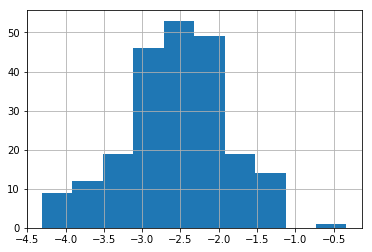

In [104]:
a = (df['Quantity']*df['price'])/df['net_total_amount']
np.log(a).hist()

### En promedio la gaseosa pesa 8.2 porciento en cada factura representado asi el 8.2 porciento de este mercado

In [106]:
np.exp(-2.5)*100

8.20849986238988